# Neural Style Transfer using CycleGAN

This notebook uses generative adversarial networks (GANs) to perform neural style transfer. In particular, the method being used is called CycleGAN, which is a method for perfoming image-to-image translation based on GANs as described in <a href="https://arxiv.org/abs/1703.10593" class="external">Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks</a> (Zhu et al.).

This tutorial does not give the implementation for the CycleGAN model. The code for the model is available in the official [CycleGAN repository](https://github.com/junyanz/CycleGAN). Then, here we are giving the necessary steps to run the CycleGAN model (train and test) and a pretrained model for style transfer will also be provided.

As stated in the repository mentioned above, this notebook will use an updated repository including CycleGAN and Pix2Pix models that can be found [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix).

# Setup

## CycleGAN repository setup

First of all, we need to clone the [CycleGAN repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix).

In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

S'està clonant a «pytorch-CycleGAN-and-pix2pix»...
remote: Enumerating objects: 2443, done.
remote: Total 2443 (delta 0), reused 0 (delta 0), pack-reused 2443
S'estan rebent objectes: 100% (2443/2443), 8.18 MiB | 1.91 MiB/s, fet.
S'estan resolent les diferències: 100% (1532/1532), fet.


And follow the installation instructions from its repository [README](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix#installation).

It should be as easy as installing the project requirements file.

In [ ]:
%pip install -r https://raw.githubusercontent.com/junyanz/pytorch-CycleGAN-and-pix2pix/master/requirements.txt

**Note:** If the PyTorch version is not the appropiate for your computer, look at the official [PyTorch website](https://pytorch.org/get-started/locally/) to install the correct version.

In order to download the datasets we'll need the `tqdm` package.

In [14]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


## Datsets setup

The next step should be to download the dataset to run the CycleGAN model. That are two different datasets for which we want to translate images.

This tutorial provides a dataset of landscape images (photographs) that would be used as *content images* and a dataset of paintings from the artist Alfred Sisley that would be used as *style images*.

Let's first create a directory to store the datasets. Also, we need to create the dataset subdirectories to run the CycleGAN model.

In [4]:
import os

os.mkdir(os.path.join('./datasets', 'landscapes2sisley'))
os.mkdir(os.path.join('./datasets', 'landscapes2sisley', 'trainA'))
os.mkdir(os.path.join('./datasets', 'landscapes2sisley', 'trainB'))
os.mkdir(os.path.join('./datasets', 'landscapes2sisley', 'testA'))
os.mkdir(os.path.join('./datasets', 'landscapes2sisley', 'testB'))

Now let's download the datasets and store them in the datasets directory. The following cells download the datasets we've used but you can use other datasets as well.

First, download the training datasets.

In [ ]:
# Landscape train images
!python ./download_google_drive_large_file.py '1ch7Q6GPFLFxPLjMVzmh9U1dn__u0M1gz' './landscapes.zip'
!unzip 'landscapes.zip' -d './datasets/landscapes2sisley/trainA'
!rm 'landscapes.zip'

In [ ]:
# Style train images
!python ./download_google_drive_large_file.py '1j-7zHIcpbRYWIseBoHu_nrLrFlerArEO' './styles.zip'
!unzip 'styles.zip' -d './datasets/landscapes2sisley/trainB'
!rm 'styles.zip'

For testing purposes we should only need some landscape images that could also be from the training set. Despite this, the CycleGAN model is run with both datasets. So, we could use the datasets created previously and split them in train and test or run the following cells that will download some landscape samples and one image from the artist Alfred Sisley to avoid leaving the test dataset empty.

In [ ]:
# Landscape test images
!python ./download_google_drive_large_file.py '1s84US-V6-U_82fs19gcjqVDi3giGEyiL' './landscapes.zip'
!unzip 'landscapes.zip' -d './datasets/landscapes2sisley/testA'
!rm 'landscapes.zip'

In [7]:
# Style test images
!python ./download_google_drive_large_file.py '1qknOMJkMg_mIUNwcCkB7FX5pA81LRHzs' './styles.zip'
!unzip 'styles.zip' -d './datasets/landscapes2sisley/testB'
!rm 'styles.zip'

224kB [00:00, 982kB/s] 
Archive:  styles.zip
  inflating: ./datasets/landscapes2sisley/testB/Alfred_Sisley_259.jpg  


**Note:** The datasets provided are reduced versions from the original ones. The original datasets have been taken from:
- [Artist paintings](https://www.kaggle.com/ikarus777/best-artworks-of-all-time)
- [Landscape images](https://www.kaggle.com/arnaud58/landscape-pictures)

## Training and Testing

Now we are all set to start running the CycleGAN model.

The common procedure would be to train the model first and then run the model trained on the test dataset. The training step can take a few hours so in order to save time, we provide some pre-trained models for style transfer.

Next cells demonstrate the steps needed to train (or load a pretrained model) and then test the model on unseen images.

### Training

If you don't want to spend time by training your own model, you can skip this section. If you are interested on training your own model or using a different dataset from the ones provided, the following cell has the necessary code to train the model. We will use the script `train.py` provided in the CycleGAN repository, we will train the model with the default parameters provided by the owners but you can explore all available options in the [options folder](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/tree/master/options) of the repository.

**Optional:** As explained in the original repository, the visdom package is used to visualize the training process. If you want to monitor the training process, you will need to run, in the command line, the following command:
```
python -m visdom.server
```
and open the browser at http://localhost:8097/ to see the training process.

In [2]:
!python pytorch-CycleGAN-and-pix2pix/train.py \
    --dataroot './datasets/landscapes2sisley/' \
    --name 'landscapes_sisley' \
    --checkpoints_dir './checkpoints' \
    --model 'cycle_gan' \
    --no_dropout \
    --verbose

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/landscapes2sisley/ 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

Once the process finishes, the trained model will be stored on the checkpoints folder inside the experiment subfolder.

### Download pre-trained Models

This section aims to download the pre-trained models for style transfer. If you have already run the training process you can skip this section.

In order to retrieve the pretrained models, we first need to create an experiment folder inside the `checkpoints` folder.

In [5]:
import os

os.mkdir(os.path.join('./checkpoints', 'pretrained_landscapes_sisley'))

Now we only need to download the pre-trained models and store them in the experiment folder.

In [1]:
!python ./download_google_drive_large_file.py '11Ebf0cq7zjw7r39zfA7JfS5Aqo2gaqEk' './checkpoints/pretrained_landscapes_sisley/latest_net_D_A.pth'
!python ./download_google_drive_large_file.py '1wQhfDZyjIkgCNLsKPdb2O12p5_R9iX3c' './checkpoints/pretrained_landscapes_sisley/latest_net_D_B.pth'
!python ./download_google_drive_large_file.py '1z07bud1T3DsTjFCbHAj3Wondq7HAolgk' './checkpoints/pretrained_landscapes_sisley/latest_net_G_A.pth'
!python ./download_google_drive_large_file.py '1v3FaFMD8AbbWV5fWxmP6IhmhjKbLNW6r' './checkpoints/pretrained_landscapes_sisley/latest_net_G_B.pth'

./download_google_drive_large_file.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(sys.argv) is not 3:
10.6MB [00:03, 3.46MB/s]
./download_google_drive_large_file.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(sys.argv) is not 3:
10.6MB [00:03, 3.38MB/s]
./download_google_drive_large_file.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(sys.argv) is not 3:
43.4MB [00:24, 1.85MB/s]
./download_google_drive_large_file.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(sys.argv) is not 3:
43.4MB [00:10, 4.50MB/s]


### Testing

Now, you should have a trained model ready to be used for testing (either the one you trained or a pretrained one).

To test the model, we now use the `test.py` script provided in the CycleGAN repository. Again, we will use the default parameters provided by the owners but you can explore all available options as said in the training section.

When running the model we need to specify a dataset folder as done before with the training phase. Inside this folder, the test subfolders should have at least one image inside them (this should be covered by the datasets section).

In order to select the model trained, we need to specify the checkpoint folder to be the same as the one used until now, i.e. `./checkpoints/`. And, also the experiment name (`name`) is important to tell the model which experiment checkpoints we want to load. For example:
- If we want to use the trained model on this notebook, we should set the `name` parameter to `landscapes_sisley`.
- If we want to use the pretrained model downloaded in this notebook, we should set the `name` parameter to `pretrained_landscapes_sisley`.

In [2]:
!python pytorch-CycleGAN-and-pix2pix/test.py \
    --dataroot './datasets/landscapes2sisley/' \
    --model 'cycle_gan' \
    --name 'pretrained_landscapes_sisley' \
    --checkpoints_dir './checkpoints' \
    --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/landscapes2sisley/ 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Once the test script has finished, the results will be stored in the `results` folder inside the experiment name subfolder.

### Visualize results

Finally, let's visualize the resulting images obtained in the test phase

In [2]:
import os

image_results_path = os.path.join('./results', 'pretrained_landscapes_sisley', 'test_latest', 'images')
image_results = sorted(os.listdir(image_results_path))

In [ ]:
%pip install matplotlib

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

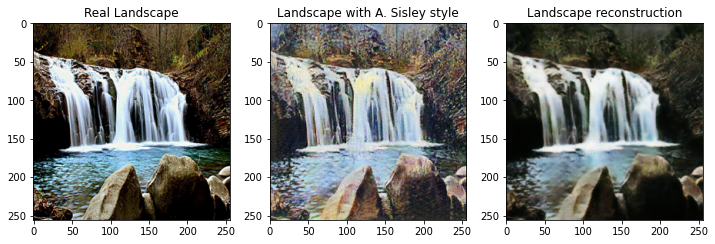

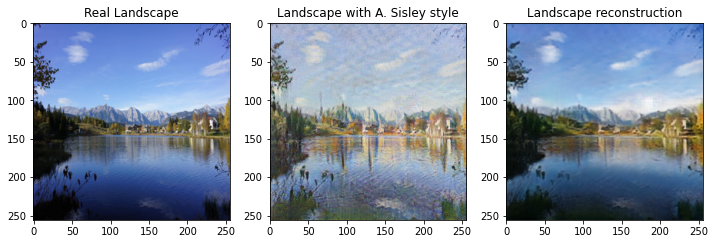

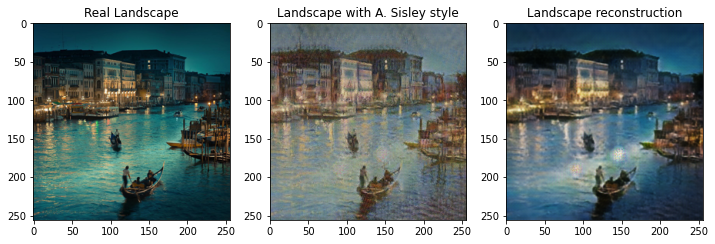

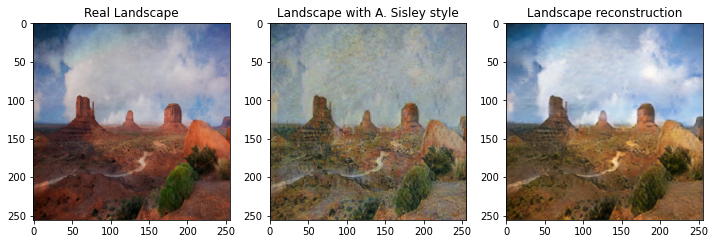

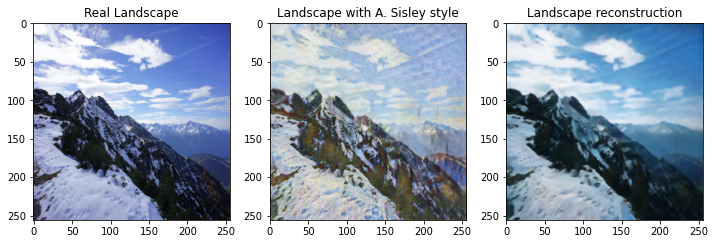

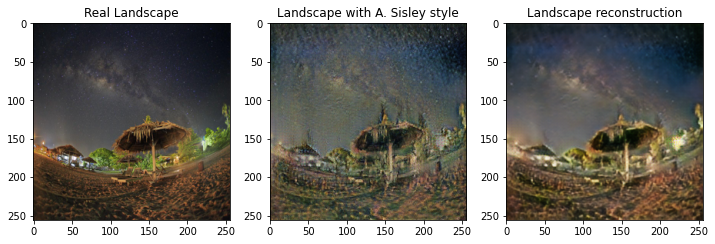

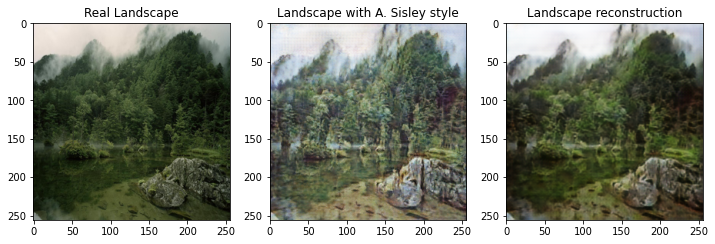

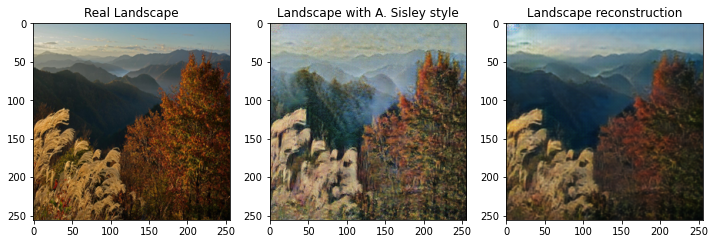

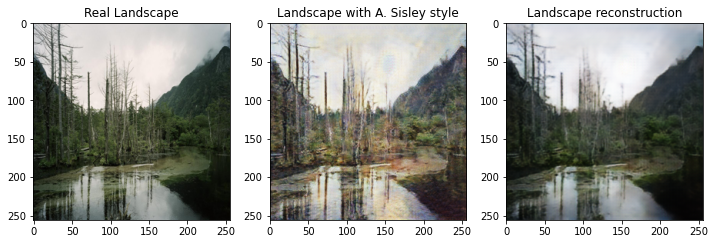

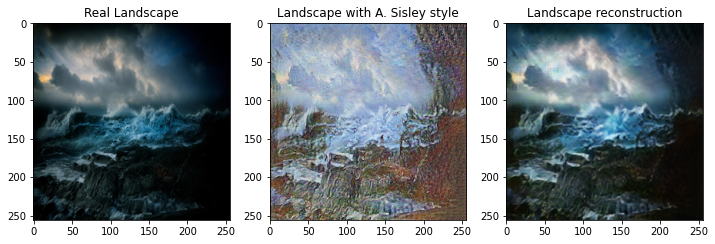

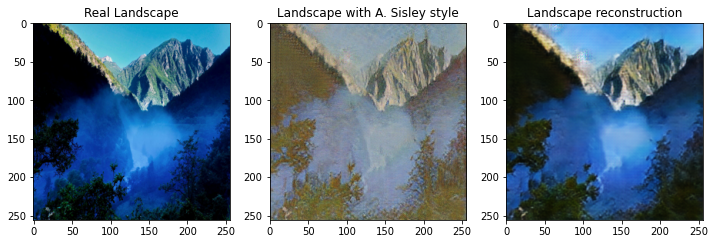

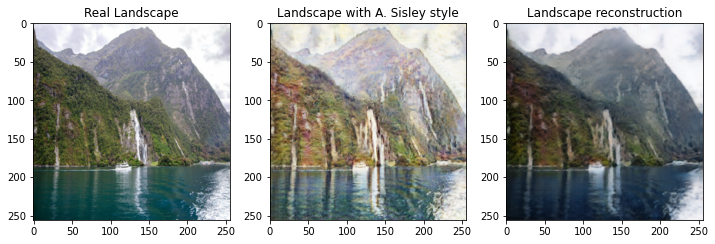

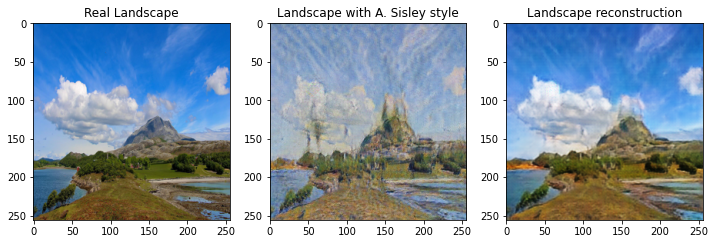

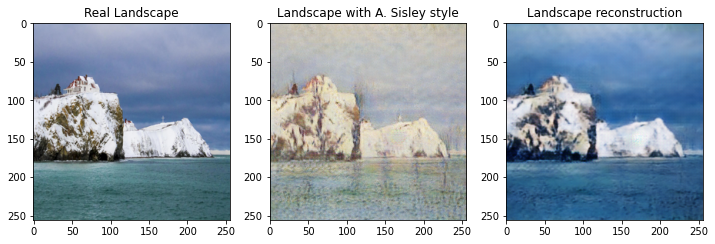

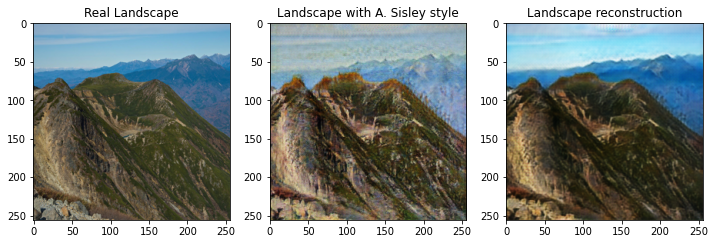

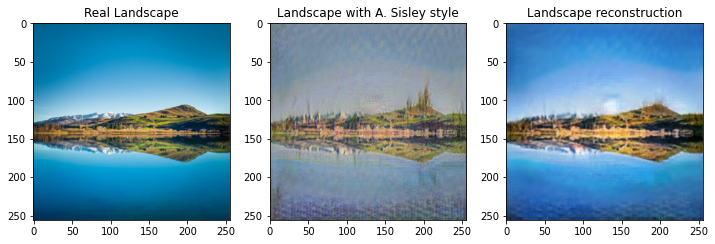

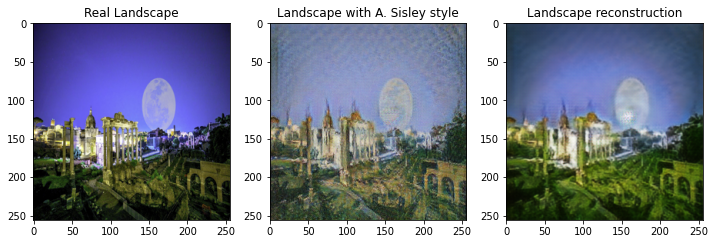

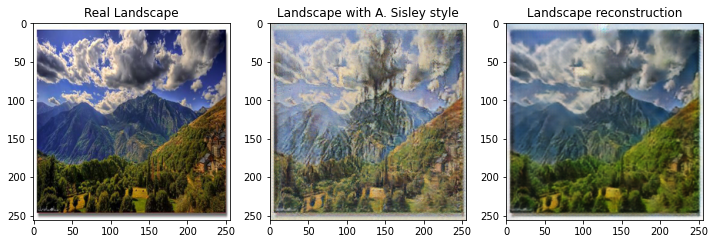

In [14]:
for i in range(0, len(image_results), 6):
    real_A = image_results[i+2]
    fake_B = image_results[i+1]
    rec_A = image_results[i+4]
    
    plt.subplot(1, 3, 1)
    plt.title('Real Landscape')
    plt.imshow(plt.imread(os.path.join(image_results_path, real_A)))
    plt.subplot(1, 3, 2)
    plt.title('Landscape with A. Sisley style')
    plt.imshow(plt.imread(os.path.join(image_results_path, fake_B)))
    plt.subplot(1, 3, 3)
    plt.title('Landscape reconstruction')
    plt.imshow(plt.imread(os.path.join(image_results_path, rec_A)))

    plt.show()
